# Week VIII: NLP Part 2 - Text Generation

Today we're going to cover NLP text generation. We'll train RNN models (GRU) on books in order to create whole new texts.

We'll train our models on two different datasets and see how it affects their style.

## First dataset: War and Peace

For our first example, we'll train an RNN model on the book War and Peace by Leo Tolstoy. Old books are often in public domain, we it's easy to obtain them. The datasets in this notebook were taken from [Project Gutenberg](https://www.gutenberg.org/).

As usual, let's mount Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We're going to read the book from a .txt file:

In [2]:
raw_text = open('/content/drive/My Drive/war_and_peace.txt', 'r', encoding='utf-8').read()

In [5]:
len(raw_text)

3227519

As we can see, the book begins with a preamble:

In [3]:
raw_text[:1000]

'The Project Gutenberg eBook of War and Peace, by Leo Tolstoy\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: War and Peace\n\nAuthor: Leo Tolstoy\n\nTranslators: Louise and Aylmer Maude\n\nRelease Date: April, 2001 [eBook #2600]\n[Most recently updated: January 21, 2019]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\nProduced by: An Anonymous Volunteer and David Widger\n\n*** START OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***\n\n\n\n\nWAR AND PEACE\n\n\nBy Leo Tolstoy/Tolstoi\n\n\n    Contents\n\n    BOOK ONE: 1805\n\n    CHAPTER I\n\n    CHAPTER II\n\n    CHAPTER 

And ends with a legal notice:

In [4]:
raw_text[-18000:]

'\nroyalties. Special rules, set forth in the General Terms of Use part\nof this license, apply to copying and distributing Project\nGutenberg-tm electronic works to protect the PROJECT GUTENBERG-tm\nconcept and trademark. Project Gutenberg is a registered trademark,\nand may not be used if you charge for an eBook, except by following\nthe terms of the trademark license, including paying royalties for use\nof the Project Gutenberg trademark. If you do not charge anything for\ncopies of this eBook, complying with the trademark license is very\neasy. You may use this eBook for nearly any purpose such as creation\nof derivative works, reports, performances and research. Project\nGutenberg eBooks may be modified and printed and given away--you may\ndo practically ANYTHING in the United States with eBooks not protected\nby U.S. copyright law. Redistribution is subject to the trademark\nlicense, especially commercial redistribution.\n\nSTART: FULL LICENSE\n\nTHE FULL PROJECT GUTENBERG LICENS

These two parts are of no iterest to us.

We'll skip to the actual book by looking for its famous opening line:

In [6]:
book_start = raw_text.find('Well, Prince, so Genoa and Lucca')
book_start

7488

And the book ends with its legal license which does not interest us. We'll find its beginning 

In [7]:
book_end = raw_text.find('*** END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***')
book_end

3209114

Let's keep only the book itself:

In [8]:
book = raw_text[book_start:book_end]

In [9]:
book[:1000]

'Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don’t tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by that\nAntichrist—I really believe he is Antichrist—I will have nothing\nmore to do with you and you are no longer my friend, no longer my\n‘faithful slave,’ as you call yourself! But how do you do? I see I\nhave frightened you—sit down and tell me all the news.”\n\nIt was in July, 1805, and the speaker was the well-known Anna Pávlovna\nSchérer, maid of honor and favorite of the Empress Márya Fëdorovna.\nWith these words she greeted Prince Vasíli Kurágin, a man of high\nrank and importance, who was the first to arrive at her reception. Anna\nPávlovna had had a cough for some days. She was, as she said, suffering\nfrom la grippe; grippe being then a new word in St. Petersburg, used\nonly by the elite.\n\nAll her invitations without exception, written in French, and delivered\nby a s

And replace new line characters with spaces:

In [10]:
book = book.replace("\n", " ")
book[:1000]

'Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if you don’t tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that Antichrist—I really believe he is Antichrist—I will have nothing more to do with you and you are no longer my friend, no longer my ‘faithful slave,’ as you call yourself! But how do you do? I see I have frightened you—sit down and tell me all the news.”  It was in July, 1805, and the speaker was the well-known Anna Pávlovna Schérer, maid of honor and favorite of the Empress Márya Fëdorovna. With these words she greeted Prince Vasíli Kurágin, a man of high rank and importance, who was the first to arrive at her reception. Anna Pávlovna had had a cough for some days. She was, as she said, suffering from la grippe; grippe being then a new word in St. Petersburg, used only by the elite.  All her invitations without exception, written in French, and delivered by a scarlet-liveried f

### Creating a dataset

We'll be using Tensorflow Datasets in order to improve efficiency.

Let's create our vocabulary. This time we're going to make character-level predictions so the vocabulary is going to be composed of characters and not words:

In [11]:
vocab = sorted(set(book))
vocab

[' ',
 '!',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'À',
 'Á',
 'É',
 'à',
 'á',
 'â',
 'ä',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'í',
 'î',
 'ï',
 'ó',
 'ô',
 'ö',
 'ú',
 'ü',
 'ý',
 'œ',
 '—',
 '‘',
 '’',
 '“',
 '”']

We'll use a preprocessing layer which maps string features to integer indices on the vocabulary:

In [12]:
import tensorflow as tf
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)

Notice it's case sensitive:

In [13]:
ids_from_chars(['A', 'a'])

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([24, 50])>

And the other way around:

In [14]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [15]:
chars_from_ids([24, 50])

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'A', b'a'], dtype=object)>

Now let's convert the entire book to a character-level tensor:

In [16]:
all_ids = ids_from_chars(tf.strings.unicode_split(book, 'UTF-8'))
all_ids

<tf.Tensor: shape=(3201626,), dtype=int64, numpy=array([46, 54, 61, ...,  1,  1,  1])>

Now we can convert it to a tf Dataset:

In [17]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

And view the results:

In [18]:
for ids in ids_dataset.take(12):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

W
e
l
l
,
 
P
r
i
n
c
e


### Defining the problem

Given a starting series of characters, we want to generate more characters according to some learned logic.

In this case, we'll use sequences of 100 charcters:

In [24]:
seq_length = 100
examples_per_epoch = len(book)//(seq_length+1)

sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))  
  print([n.decode('utf-8') for n in chars_from_ids(seq).numpy()])

tf.Tensor(
[b'W' b'e' b'l' b'l' b',' b' ' b'P' b'r' b'i' b'n' b'c' b'e' b',' b' '
 b's' b'o' b' ' b'G' b'e' b'n' b'o' b'a' b' ' b'a' b'n' b'd' b' ' b'L'
 b'u' b'c' b'c' b'a' b' ' b'a' b'r' b'e' b' ' b'n' b'o' b'w' b' ' b'j'
 b'u' b's' b't' b' ' b'f' b'a' b'm' b'i' b'l' b'y' b' ' b'e' b's' b't'
 b'a' b't' b'e' b's' b' ' b'o' b'f' b' ' b't' b'h' b'e' b' ' b'B' b'u'
 b'o' b'n' b'a' b'p' b'a' b'r' b't' b'e' b's' b'.' b' ' b'B' b'u' b't'
 b' ' b'I' b' ' b'w' b'a' b'r' b'n' b' ' b'y' b'o' b'u' b',' b' ' b'i'
 b'f' b' ' b'y'], shape=(101,), dtype=string)
['W', 'e', 'l', 'l', ',', ' ', 'P', 'r', 'i', 'n', 'c', 'e', ',', ' ', 's', 'o', ' ', 'G', 'e', 'n', 'o', 'a', ' ', 'a', 'n', 'd', ' ', 'L', 'u', 'c', 'c', 'a', ' ', 'a', 'r', 'e', ' ', 'n', 'o', 'w', ' ', 'j', 'u', 's', 't', ' ', 'f', 'a', 'm', 'i', 'l', 'y', ' ', 'e', 's', 't', 'a', 't', 'e', 's', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'B', 'u', 'o', 'n', 'a', 'p', 'a', 'r', 't', 'e', 's', '.', ' ', 'B', 'u', 't', ' ', 'I', ' ', 'w', 'a', 

And now we can define the labels. Let's look at an example using this auxiliary fucntion:

In [25]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [26]:
split_input_target('12345')

('1234', '2345')

In this example, we're mapping '1234' -> '2345'. Similarily, we do the same things for the 101-length sequences we created earlier. We now apply it to the whole dataset using 'map':

In [27]:
dataset = sequences.map(split_input_target)

Now we join the single charcters into strings again:

In [28]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

Let's test this function:

In [32]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if '
Target: b'ell, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if y'


Apply on entire dataset:

In [33]:
# Taken directly from TF guide

# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

And now we can move on and use this dataset.

### Build model

We're going to begin by using embeddings with a GRU layer.

In [34]:
# Length of the vocabulary in chars
vocab_size = len(vocab)
vocab_size

103

In [35]:
# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

Let's recall what LSTM and GRU are:

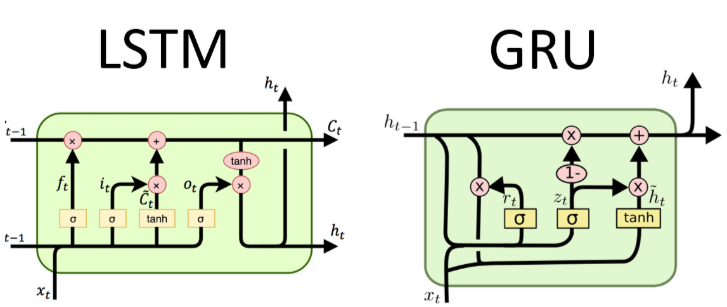

LSTM has 3 gates: forget, input, and output.

GRU has only two gates: reset and update.

Consequently, GRUs are faster.

We'll create a special class for this model. It inherits from tf.keras.Model.

In [36]:
class GRUModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

Build the model instance:

In [37]:
war_and_peace_gru_model = GRUModel(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

Use it on some random data without training:

In [38]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = war_and_peace_gru_model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 104) # (batch_size, sequence_length, vocab_size)


In [39]:
war_and_peace_gru_model.summary()

Model: "gru_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  26624     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  106600    
                                                                 
Total params: 4,071,528
Trainable params: 4,071,528
Non-trainable params: 0
_________________________________________________________________


Take one random example:

In [40]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([ 94,   1,  79,  54,  51,  92,  63,   2,  33,  74,   1,  35,  31,
        43,  97,  52,  40,  78,  79,  21,  82,  80,  16,  71,   3,  13,
        24,  15,  23,  33,  92,  68,  79,  18,  29,  87,  47,   6,  51,
        24,  51,  73,  31,  66,  42,  80,  15,  40,  82,  27,  89,  86,
       103,   2,   4,  34,  91,  63,  38,  42,  34,  98,  46,  12,   0,
        80,  18,  56,  68,  79,  45, 100,  31,  53,  26,  22,  49,  68,
       102,  66,  63,  73,  40,  41,  88,  16,  88,  16,  80,  40,  59,
         1,  77,  99,  18,  55,  77,  69,  27,  94])

And test the model:

In [41]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy().decode('utf-8'))
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy().decode('utf-8'))

Input:
 ki like the rest of the men on the bridge did not take his eyes off the women till they had passed. 

Next Char Predictions:
 ö àebón!Jy LHTýcQÉà;äá6v(3A5?Jósà8FêX,bAbxHqSá5QäDíé”!)KïnOSKœW2[UNK]á8gsàV‘HdC=Zs“qnxQRë6ë6áQj Á—8fÁtDö


This is terrible! The model is outputing pure gibberish.

### Train model

Compile the model using sparse nll which gives us the most likely character as pur prediction:

In [42]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

sparse_nll = SparseCategoricalCrossentropy(from_logits=True)
war_and_peace_gru_model.compile(optimizer='adam', loss=sparse_nll)

Note that we used 'from_logits=True'. This is because we didn't use any probabilistic activation on our output layer.

Let's create a ModelCheckpoint instance. This time we're using a sub-classe model, we Keras can't save it. Instead, we can save just its weights. We're going to save them directly to Google Drive:

In [43]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint


def create_checkpoint(model_name, epochs):
  checkpoint_dir = os.path.join('/content/drive/My Drive/nlp_checkpoints', model_name)
  checkpoint_prefix = os.path.join(checkpoint_dir, str(epochs) + "_epochs", str(epochs) + "_epochs_cp.ckpt")

  checkpoint_callback = ModelCheckpoint(
      filepath=checkpoint_prefix,
      save_weights_only=True,
      save_best_only=True,
      monitor='val_loss',
      mode='min',
      verbose=1)
  return checkpoint_callback, checkpoint_prefix

Set the number of epochs:

In [44]:
EPOCHS = 5

Train-val split:

In [45]:
len(dataset)

495

In [46]:
train_size = int(0.8 * len(dataset))
val_size = int(0.2 * len(dataset))

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [47]:
len(train_dataset), len(val_dataset)

(396, 99)

Set model name:

In [48]:
checkpoint_callback, checkpoint_prefix = create_checkpoint('war_and_peace_gru', EPOCHS)

Only train model if weights don't exist:

In [49]:
checkpoint_prefix

'/content/drive/My Drive/nlp_checkpoints/war_and_peace_gru/5_epochs/5_epochs_cp.ckpt'

In [50]:
os.path.dirname(checkpoint_prefix)

'/content/drive/My Drive/nlp_checkpoints/war_and_peace_gru/5_epochs'

In [51]:
os.path.exists(os.path.dirname(checkpoint_prefix))

True

Train model/load weights:

In [52]:
if os.path.exists(os.path.dirname(checkpoint_prefix)):
  war_and_peace_gru_model.load_weights(checkpoint_prefix)
else:
  war_and_peace_gru_model.fit(train_dataset, 
                              validation_data=val_dataset, 
                              epochs=EPOCHS,
                              callbacks=[checkpoint_callback])

### Multiple step vs. single step predictions

In [53]:
# Taken directly from TF guide

class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

Define one step model:

In [54]:
one_step_model = OneStep(war_and_peace_gru_model, chars_from_ids, ids_from_chars)

Let's build a function to test it for 1,000 future characters:

In [55]:
from tqdm.notebook import tqdm as notebook_tqdm


def predict_multiple_steps(start_string, one_step_model):
  states = None
  next_char = tf.constant([start_string])
  result = [next_char]

  for n in notebook_tqdm(range(1000)):
    next_char, states = one_step_model.generate_one_step(next_char, states=states)
    result.append(next_char)

  result = tf.strings.join(result)
  return result

In [59]:
result = predict_multiple_steps('The answer to that question ', one_step_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [60]:
print(result[0].numpy().decode('utf-8'))

The answer to that question after the whole coach who went into the day before Countess Mary. “We should have a thint again and commanding, his mustache were always reasoned it astonished superstanded what he is dull, with the blue. A Catial chanted the Countess Rostóvs would able he could spent thousand more impossible to show the plocks as retains.  That in uniform led there and sat not the denewate rebettaters over over the street would begin a second thirdeners. The cause of the seats secured to make other certain marshal’s and was pacing, which snews of height to she had been tharked without fear then, but he had said to move that plans of used to speak and he had to hare that the long word and expressed it in the others in the death in Platter Firal secutal one’s opponent, without connection in history and its own close. “If of my Kutúzov especially this.”  “Come!” she rodejounded only.  “Heaven dagger is only in no historians, who formere the mobelt women war the Cente! I’ll wav

And here after only 5 epochs we see a fascinating results. Our model seems to have learned a few interesting linguistical concepts:



*   Punctuation: we see that commas and full stops are used somewhat correctly.
*   Capitalization: persons/names are capitalized.

On the other hand, 
*   Grammar: the grammar is a bit broken.
*   Spelling: many words are not real existent words. 
*   Meaning: the sentence is completely nonsensical.




Let's try for a few more epochs:

In [61]:
EPOCHS = 40

In [62]:
checkpoint_callback, checkpoint_prefix = create_checkpoint('war_and_peace_gru', EPOCHS)

In [63]:
if os.path.exists(os.path.dirname(checkpoint_prefix)):
  war_and_peace_gru_model.load_weights(checkpoint_prefix)
else:
  war_and_peace_gru_model.fit(train_dataset, 
                              validation_data=val_dataset, 
                              epochs=EPOCHS,
                              callbacks=[checkpoint_callback])

In [64]:
one_step_model = OneStep(war_and_peace_gru_model, chars_from_ids, ids_from_chars)

Repeat the exact same sentence:

In [65]:
result = predict_multiple_steps('The answer to that question ', one_step_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [66]:
print(result[0].numpy().decode('utf-8'))

The answer to that question in quite a new rule she failed to retire beyond that space.  “Oh, Bolked that young people has its ideal sooner by May I will do what she has told me, I must employ it?” thought he. “How is he? Jay be it, thister about whose words what is this?” he added, gazing on the old life chiefly household at the pistol at the village of Schlappanitz, when her superior circle is too proud of what they are living in living with French. Her loose days in the village Klyucharëvich, where the historians other because Napoleon wished completely to to the ground for at heart the success of their country. Besides, your excellency’s theory, live when the state of mind means that it constrained him for hay implored my new guide anything. On the contrary is in its undefined swammered rapidity. He is one of them, are we are only alone without selling the great news the idea to the pond to shámovod. He frowned. What stupid one he said and that his wife’s nightcap. Though two month

This time we see slightly different results.

*   Capitalization: persons/names are capitalized, as well as initial letters after a full stop.
*   Grammar: still broken, but imrpoved a bit.
*   Spelling: this time most of the words are not real existent words. 
*   Meaning: still no complete inderstandable meaning*.

*This is a known concept in linguistics. See [Colorless green ideas sleep furiously
](https://en.wikipedia.org/wiki/Colorless_green_ideas_sleep_furiously#:~:text=Colorless%20green%20ideas%20sleep%20furiously%20is%20a%20sentence%20composed%20by,%2Dformed%2C%20but%20semantically%20nonsensical.).



We can also try and experiment a bit with the temperature parameter:

In [67]:
one_step_model = OneStep(war_and_peace_gru_model, chars_from_ids, ids_from_chars, temperature=0.5)
result = predict_multiple_steps('The answer to that question ', one_step_model)
print(result[0].numpy().decode('utf-8'))

  0%|          | 0/1000 [00:00<?, ?it/s]

The answer to that question in what can be done of military man.      CHAPTER III  The father he had to say that he had not seen at Krásnoe. This fact was occupied by the cavalry regiments had been a child seemed to him the absence of the exition that had been accustomed to say that the happiness of the hive lady’s march on the faces of the campfire, and sending about their houses and carrying her hands to his father’s part in his daughter’s and Prince Andrew had been taken from the monky, the regiment began to draw them in the morning, the countess was to blame to him to repeat his wife’s departure. He was wearing a battle and timid special and unexpected silent and a slundered city which replied that he had not discussed the army.  The Frenchman’s conception of the fact that the season was calm on the movement of the windows of the corridor, began to talk about him, was conscious of him, but with a sob, both paused in his breast, and told him to ask him to mean to see the Emperor’s a

In [68]:
one_step_model = OneStep(war_and_peace_gru_model, chars_from_ids, ids_from_chars, temperature=0.1)
result = predict_multiple_steps('The answer to that question ', one_step_model)
print(result[0].numpy().decode('utf-8'))

  0%|          | 0/1000 [00:00<?, ?it/s]

The answer to that question he was standing in the midst of a second soldier with a book of fire they had seen in the morning and the carriage wandering some price like a child and the more repulsive to him about me and that he had to come to dinner. He could not say when I see that he has no resolution of the movement of the carriages, and so forth. The count interrupted him.  “What do you want?”  “Why she’ll be happy?” she asked herself in a whisper.  “It’s the fate of your baggage and you.”  The soldiers were closed, the soldiers who were carrying the large house where he had left the room he was sitting in the same way the more he understood that the count thought of the state of mind and the more repulsive the possibility of life which he had to deliver the Emperor to ask Pierre to his father’s conditions to the servants’ with the army to a command of the army to the man who had stopped. He was a very clever man, but the more he recognized the troops to ascertain whether the comma

## Retrain on Iliad

Let's move to a different, perhaps more difficult example. This time, we'll train the model on the Iliad by Homer. Its difficulty stems from 3 factors:


*   Smaller dataset
*   Larger vocabulary (Greek characters)
*   Poetry format


Let's repeat the whole process:

### Build dataset

In [69]:
iliad = open('/content/drive/My Drive/iliad.txt', 'r', encoding='utf-8').read()

This time the book begins with three long introductions which are not in the style of the Iliad. Let's skip to the poetry section:

In [70]:
iliad_start = iliad.find('In the war of Troy')
iliad_start

117695

In [71]:
iliad_end = raw_text.find('*** END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***')
iliad_end

3209114

In [72]:
iliad_book = iliad[iliad_start:iliad_end]

This time, due to the poetry format we're going to keep the newline characters. Let's use pretty print to view it correctly:

In [73]:
from pprint import pprint
pprint(iliad_book[:1000])

('In the war of Troy, the Greeks having sacked some of the neighbouring\n'
 'towns, and taken from thence two beautiful captives, Chryseïs and\n'
 'Briseïs, allotted the first to Agamemnon, and the last to Achilles.\n'
 'Chryses, the father of Chryseïs, and priest of Apollo, comes to the\n'
 'Grecian camp to ransom her; with which the action of the poem opens, in\n'
 'the tenth year of the siege. The priest being refused, and insolently\n'
 'dismissed by Agamemnon, entreats for vengeance from his god; who\n'
 'inflicts a pestilence on the Greeks. Achilles calls a council, and\n'
 'encourages Chalcas to declare the cause of it; who attributes it to the\n'
 'refusal of Chryseïs. The king, being obliged to send back his captive,\n'
 'enters into a furious contest with Achilles, which Nestor pacifies;\n'
 'however, as he had the absolute command of the army, he seizes on\n'
 'Briseïs in revenge. Achilles in discontent withdraws himself and his\n'
 'forces from the rest of the Greeks; and c

In [74]:
pprint(iliad_book[2000:3000])

('on a dire contagion spread,[44]\n'
 'And heap’d the camp with mountains of the dead;\n'
 'The king of men his reverent priest defied,[45]\n'
 'And for the king’s offence the people died.\n'
 '\n'
 'For Chryses sought with costly gifts to gain\n'
 'His captive daughter from the victor’s chain.\n'
 'Suppliant the venerable father stands;\n'
 'Apollo’s awful ensigns grace his hands:\n'
 'By these he begs; and lowly bending down,\n'
 'Extends the sceptre and the laurel crown.\n'
 'He sued to all, but chief implored for grace\n'
 'The brother-kings, of Atreus’ royal race[46]\n'
 '\n'
 '“Ye kings and warriors! may your vows be crown’d,\n'
 'And Troy’s proud walls lie level with the ground.\n'
 'May Jove restore you when your toils are o’er\n'
 'Safe to the pleasures of your native shore.\n'
 'But, oh! relieve a wretched parent’s pain,\n'
 'And give Chryseïs to these arms again;\n'
 'If mercy fail, yet let my presents move,\n'
 'And dread avenging Phœbus, son of Jove.”\n'
 '\n'
 'The Greeks

Remove all brackets (references and explanations):

In [75]:
import re
iliad_book = re.sub('\[[^]]*\]', '', iliad_book)

And verify they're gone:

In [76]:
pprint(iliad_book[2000:3000])

('ntagion spread,\n'
 'And heap’d the camp with mountains of the dead;\n'
 'The king of men his reverent priest defied,\n'
 'And for the king’s offence the people died.\n'
 '\n'
 'For Chryses sought with costly gifts to gain\n'
 'His captive daughter from the victor’s chain.\n'
 'Suppliant the venerable father stands;\n'
 'Apollo’s awful ensigns grace his hands:\n'
 'By these he begs; and lowly bending down,\n'
 'Extends the sceptre and the laurel crown.\n'
 'He sued to all, but chief implored for grace\n'
 'The brother-kings, of Atreus’ royal race\n'
 '\n'
 '“Ye kings and warriors! may your vows be crown’d,\n'
 'And Troy’s proud walls lie level with the ground.\n'
 'May Jove restore you when your toils are o’er\n'
 'Safe to the pleasures of your native shore.\n'
 'But, oh! relieve a wretched parent’s pain,\n'
 'And give Chryseïs to these arms again;\n'
 'If mercy fail, yet let my presents move,\n'
 'And dread avenging Phœbus, son of Jove.”\n'
 '\n'
 'The Greeks in shouts their joint a

In [77]:
iliad_vocab = sorted(set(iliad_book))
iliad_vocab

['\n',
 ' ',
 '!',
 '"',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '§',
 'Æ',
 'à',
 'ä',
 'æ',
 'è',
 'é',
 'ë',
 'ï',
 'ò',
 'ù',
 'ü',
 'Œ',
 'œ',
 'Δ',
 'Ε',
 'Θ',
 'Κ',
 'Μ',
 'Ο',
 'α',
 'γ',
 'δ',
 'ε',
 'η',
 'θ',
 'ι',
 'κ',
 'λ',
 'μ',
 'ν',
 'ξ',
 'ο',
 'π',
 'ρ',
 'ς',
 'σ',
 'τ',
 'υ',
 'φ',
 'χ',
 'ω',
 'ἀ',
 'ἂ',
 'ἐ',
 'ἑ',
 'ἕ',
 'ἡ',
 'ἤ',
 'ἦ',
 'ἰ',
 'ἱ',
 'ἷ',
 'ὁ',
 'ὅ',
 'Ὀ',
 'Ὁ',
 'Ὅ',
 'ὐ',
 'ὔ',
 'Ὡ',
 'ὰ',
 'ά',
 'ὲ',
 'έ',
 'ὴ',
 'ή',
 'ὶ',
 'ί',
 'ὸ',
 'ό',
 'ὺ',
 'ύ',
 'ώ',
 'ᾳ',
 'ῆ',
 'ῇ',
 'ῖ',
 'ῦ',
 'ῳ',
 'ῶ',
 'ῷ',
 '—',
 '‘',
 '’',
 '“

We have a larger vocabulary that containts a lot of Greek characters as well.

Repeat the exact same process as before:

In [78]:
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(iliad_vocab), mask_token=None)

In [79]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [80]:
all_ids = ids_from_chars(tf.strings.unicode_split(iliad_book, 'UTF-8'))
all_ids

<tf.Tensor: shape=(995298,), dtype=int64, numpy=array([37, 69,  2, ..., 66, 74, 14])>

In [81]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [82]:
for ids in ids_dataset.take(13):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

I
n
 
t
h
e
 
w
a
r
 
o
f


In [83]:
seq_length = 100
examples_per_epoch = len(iliad_book)//(seq_length+1)

sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'I' b'n' b' ' b't' b'h' b'e' b' ' b'w' b'a' b'r' b' ' b'o' b'f' b' '
 b'T' b'r' b'o' b'y' b',' b' ' b't' b'h' b'e' b' ' b'G' b'r' b'e' b'e'
 b'k' b's' b' ' b'h' b'a' b'v' b'i' b'n' b'g' b' ' b's' b'a' b'c' b'k'
 b'e' b'd' b' ' b's' b'o' b'm' b'e' b' ' b'o' b'f' b' ' b't' b'h' b'e'
 b' ' b'n' b'e' b'i' b'g' b'h' b'b' b'o' b'u' b'r' b'i' b'n' b'g' b'\n'
 b't' b'o' b'w' b'n' b's' b',' b' ' b'a' b'n' b'd' b' ' b't' b'a' b'k'
 b'e' b'n' b' ' b'f' b'r' b'o' b'm' b' ' b't' b'h' b'e' b'n' b'c' b'e'
 b' ' b't' b'w'], shape=(101,), dtype=string)


In [84]:
dataset = sequences.map(split_input_target)

In [85]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'In the war of Troy, the Greeks having sacked some of the neighbouring\ntowns, and taken from thence t'
Target: b'n the war of Troy, the Greeks having sacked some of the neighbouring\ntowns, and taken from thence tw'


In [86]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

### Build model

In [87]:
# Length of the vocabulary in chars
vocab_size = len(iliad_vocab)
vocab_size

168

In [88]:
# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [89]:
iliad_gru_model = GRUModel(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [97]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = iliad_gru_model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 169) # (batch_size, sequence_length, vocab_size)


In [98]:
iliad_gru_model.summary()

Model: "gru_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     multiple                  43264     
                                                                 
 gru_1 (GRU)                 multiple                  3938304   
                                                                 
 dense_1 (Dense)             multiple                  173225    
                                                                 
Total params: 4,154,793
Trainable params: 4,154,793
Non-trainable params: 0
_________________________________________________________________


In [99]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([102, 118, 116,   4,  39,  25,  27,  88,  36, 152,  77,  70, 112,
        51,  90,  26,  22,  30, 142,  67,   2,   7,  73, 112,  41,  66,
       100,   0,  64, 149,  12,   0, 113,  98,  90,  56,  21,  20, 164,
       143,   2,  57, 166, 131,  40,  31, 131,  70, 139,  23,  70,   9,
       153, 142, 125,  78,  56, 127,  56,  43,  28, 167, 109,  69,  59,
       150,   2,  14, 133,  58, 153,   7,  99,  25,   7, 114,  39,  36,
       104,  84, 165,  43,  52,  76, 125,  46,  16,  95,   8,  40, 127,
       134, 102, 148,  44,  69,  85, 165, 101, 144])

And again we see that without traiing the prediction is useless:

In [100]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy().decode('utf-8'))
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy().decode('utf-8'))

Input:
  making the boaster vanquished, has drawn a better
 moral from this episode than Homer. The followin

Next Char Predictions:
 ασρ"K9;éHόvoνWï:6BὩl &rνMkΜ[UNK]iὶ,[UNK]ξΘïa54—ὰ b’ἦLCἦoὍ7o(ὺὩἂwaἑaO?“κndί .ἱcὺ&Κ9&οKHδà‘OXuἂR0œ'LἑἷαήPnä‘Οά


In [101]:
sparse_nll = SparseCategoricalCrossentropy(from_logits=True)
iliad_gru_model.compile(optimizer='adam', loss=sparse_nll)

### Train model

In [102]:
EPOCHS = 5

In [103]:
len(dataset)

153

In [104]:
train_size = int(0.8 * len(dataset))
val_size = int(0.2 * len(dataset))

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [105]:
len(train_dataset), len(val_dataset)

(122, 31)

In [106]:
checkpoint_callback, checkpoint_prefix = create_checkpoint('iliad_gru', EPOCHS)

In [107]:
if os.path.exists(os.path.dirname(checkpoint_prefix)):
  iliad_gru_model.load_weights(checkpoint_prefix)
else:
  iliad_gru_model.fit(train_dataset, 
                      validation_data=val_dataset, 
                      epochs=EPOCHS,
                      callbacks=[checkpoint_callback])

### Predict

In [108]:
one_step_model = OneStep(iliad_gru_model, chars_from_ids, ids_from_chars)

Let's use the same starting sentence:

In [109]:
result = predict_multiple_steps('The answer to that question ', one_step_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [110]:
print(result[0].numpy().decode('utf-8'))

The answer to that question flows:
I shield the seuse o’er half thy from the werped satracles; coemTillet: aloved,
With voice with placed betius’ their said, to prayer, provides Hector cast,
Fay heaven, they vilean quire,
Round the lay raccess decrees of glory mestice, where heart?
The bear dedains bewerd in fight, andefiant. “O Troy; Noter not they glory defands;
On knees all Phœbus, there wather, at the spirthed scoin:

“Why purald stay, bure troops me, are powers deflied,
And mo ne pessemus, Ortive me to labite, and to or darring ine?
No mourner, Doiled. Noin thought he assids, and youth arms eye;
Unyus age not te his friends their greates, veil;
Supplink impetse and his bright gave,
And, may this irmshore.”

He saked th  sweep son consects, and by LiSis we Close before thyire,
Or his awfles fillden thick he follown dreads;
From but great, a goar than shield!
Now no thee: “Conto king of Cretans or the ground,
Iw on the spack honstary crown’d Imopus,
Bress’d Pallas mae,
But the belug

We already have semi-poetry style!

### More epochs

In [111]:
EPOCHS = 40

In [112]:
checkpoint_callback, checkpoint_prefix = create_checkpoint('iliad_gru', EPOCHS)

In [113]:
if os.path.exists(os.path.dirname(checkpoint_prefix)):
  iliad_gru_model.load_weights(checkpoint_prefix)
else:
  iliad_gru_model.fit(train_dataset, 
                      validation_data=val_dataset, 
                      epochs=EPOCHS,
                      callbacks=[checkpoint_callback])

In [114]:
one_step_model = OneStep(iliad_gru_model, chars_from_ids, ids_from_chars)

In [115]:
result = predict_multiple_steps('The answer to that question ', one_step_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [116]:
print(result[0].numpy().decode('utf-8'))

The answer to that question bleeds;
The next, to whom, of Atreus, to incumpts mise?
That winged Ida, would I to forbear their rise,
Again his legged spears, that bound his death they flow:
The shattering chambers sent Priam flies:
From Jove I her last rage can tame,
Achilles sees unlooting to the shore:
Till the return, Achilles heard the prize.”

He spoke; in arms shall wratt our arms around,
And conquer’d Troy’s superior sway;
Heaps fall on heaps; he bore by man they found,
And, cannot but great Hector’s soul: through all the war
Of yonder parting, wedged in firm arred;
(The sword Anthousched poets and bold Mehelaus
 gleaking, for with Grecian host,
Shall see the Greeks their labouring bosom rends,
And if to voice resides her aids before.
To the Greeks thought, down the impending woe.
And far shall our arms his tumult aid,
’Tis not for Ilion’s scarcely bred,
Who took his arm his painsel triumph from the plain,
But now the Trojan pile a reepent to the ground.”

An this we tears, and w

Now the poetry style is far clearer.

## GPT

Finally, let's GPT-2.

Generative Pre-trained Transformer 2 (GPT-2) was created by OpenAI as a general-purpose NLP model. It's one of the largest models ever, with 1.5 billion parameters. Since the even larger GPT-3 came out, OpenAI opened GPT-2 to the general public. We'll use their API to generate text:


In [117]:
import requests
r = requests.post(
    "https://api.deepai.org/api/text-generator",
    data={
        'text': 'The answer to that question ',
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)

In [118]:
pprint(r.json()['output'])

("The answer to that question \xa0is this:\xa0 don't let us be confused when "
 'we think of this situation as a world wide issue. No matter how much we try '
 "to defend our liberties, let's live in a completely different world, where "
 'we can look back, and see ourselves as human beings from a different point '
 'of view, and see how we live the way we are now.')


In [119]:
!pip install unidecode

In [120]:
import unidecode
unidecode.unidecode(r.json()['output'])

"The answer to that question  is this:  don't let us be confused when we think of this situation as a world wide issue. No matter how much we try to defend our liberties, let's live in a completely different world, where we can look back, and see ourselves as human beings from a different point of view, and see how we live the way we are now."

Let's try lines from the Iliad:

In [121]:
r = requests.post(
    "https://api.deepai.org/api/text-generator",
    data={
        'text': "Achilles’ wrath, to Greece the direful spring \n Of woes unnumber’d, heavenly goddess, sing! \nThat wrath which hurl’d to Pluto’s gloomy reign",
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)

In [122]:
pprint(unidecode.unidecode(r.json()['output']))

("Achilles' wrath, to Greece the direful spring \n"
 " Of woes unnumber'd, heavenly goddess, sing! \n"
 "That wrath which hurl'd to Pluto's gloomy reign, the world must come \n"
 'Omniscient, thy song of a dream of Heaven may I hear,\n'
 'Omniscient, thou and thou and thou and thou and\n'
 "'Omniscient, the day and the night shall be thy glory and\n"
 "Glyfeon's. So, oh great sorrow, may the gods of the world\n"
 'And goddess call upon men of high rank\n'
 'From the sea to all the seas, to bring vengeance,\n'
 'And make men proud of the gods; And that to her their joy! And the cry of '
 'anger\n'
 'So high will the cry of vengeance end! I said to thee so: What can happen to '
 'all the gods \n'
 'That will not bring revenge? Let my wrath and sorrow cease in your eyes! And '
 'I will not let you\n'
 'Of this heaven to see the wicked, that you might understand. For I am and it '
 'comes. Behold. We have met at night with these\n'
 'And when our souls are so deep, I call upon thee to the 